In this project, you'll be working with Jupyter notebook and analyzing data on the Star Wars movies. When you're finished, you'll have a notebook you can either add to your portfolio, or expand on your own.

While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which you download from their GitHub repository (https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

# Explorative Datenanalyse

In [1]:
import pandas as pd
import numpy as np

star_wars=pd.read_csv("star_wars.csv",encoding="ISO-8859-1")
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [2]:
star_wars.shape[0]

1187

Beobachtungen:
- Resp. Id. hat eine wissenschaftliche Formatierung
- Bei der Abfrage nach den Filmen, die gesehen wurden --> Column-Titel sind unnamed und die Antworten entsprechen den Column-Titeln(wahrscheinlich entspricht es Ja)
- NaNs in einigen Columns, "Response" in einigen Columns als Antwort
- Das Ranking nach Präferenz scheint jeweils nur eine Antwort zu enthalten (--> weitere Recherche)

Review the column names with star_wars.columns.

In [3]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

Recherche zeigt: Das Ranking nach Präferenz geschieht auf die gleiche Weise, wie die Mitteilung welche Filme bereits gesehen wurden.
Das Gleiche trifft auch auf die Bewertung einzelner Personen

Remove any rows where RespondentID is NaN. You can use the pandas.notnull() function to accomplish this. Only select rows where the RespondentID column is not null.

In [4]:
star_wars["RespondentID"].isnull().sum()

1

In [5]:
star_wars.dropna(axis=0,inplace=True,subset=["RespondentID"])

In [6]:
star_wars["RespondentID"].isnull().sum()

0

Convert the Have you seen any of the 6 films in the Star Wars franchise? column to the Boolean type.

In [7]:
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts()

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [8]:
yes_no={"Yes":True,"No":False}

star_wars["Have you seen any of the 6 films in the Star Wars franchise?"]=star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no)

In [9]:
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts()

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

Convert the Do you consider yourself to be a fan of the Star Wars film franchise? column to the Boolean type.

In [10]:
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts()

Yes    552
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [11]:
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"]=star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(yes_no)

In [12]:
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts()

True     552
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

Which of the following Star Wars films have you seen? Please select all that apply.

Convert each column above so that it only contains the values True and False.
Which of the following Star Wars films have you seen? Please select all that apply. column to seen_1 and so on.

In [13]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [14]:
star_wars[star_wars.columns[3]].value_counts(dropna=False)

Star Wars: Episode I  The Phantom Menace    673
NaN                                         513
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64

In [15]:
def bool_films(row):
    for i in range(3,9):
        if row[star_wars.columns[i]] is np.nan:
            row[star_wars.columns[i]]=False
        else:
            row[star_wars.columns[i]]=True
    return row

star_wars=star_wars.apply(bool_films,axis=1)

In [16]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,True,True,True,True,True,True,True,True,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,True,True,True,True,True,True,True,True,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,True,True,True,True,True,True,True,True,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
10,3.292640e+09,True,False,False,True,False,False,False,False,1,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific


Rename each of the columns above so the names are more intuitive. We recommend using seen_1 to indicate whether the respondent saw Star Wars: Episode I The Phantom Menace, seen_2 for Star Wars: Episode II Attack of the Clones, and so on.

In [17]:
film_columns_new={}

for i in range(3,9):
    film_columns_new[star_wars.columns[i]]="seen_"+str(i-2)
    
film_columns_new

{'Unnamed: 4': 'seen_2',
 'Unnamed: 5': 'seen_3',
 'Unnamed: 6': 'seen_4',
 'Unnamed: 7': 'seen_5',
 'Unnamed: 8': 'seen_6',
 'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1'}

In [18]:
star_wars.rename(columns=film_columns_new,inplace=True)

star_wars.columns[3:9]

Index(['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6'], dtype='object')

The next six columns ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite.

Convert each of the columns above to a float type.

In [19]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦',
       'Do 

In [20]:
star_wars[star_wars.columns[9:15]]=star_wars[star_wars.columns[9:15]].astype(float)

In [21]:
film_rating_columns_n={}

for i in range (9,15):
    film_rating_columns_n[star_wars.columns[i]]="ranking_"+str(i-8)
    
star_wars.rename(columns=film_rating_columns_n,inplace=True)

star_wars.columns[9:15]

Index(['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5',
       'ranking_6'],
      dtype='object')

Now that we've cleaned up the ranking columns, we can find the highest-ranked movie more quickly.

Use the pandas.DataFrame.mean() method to compute the mean of each of the ranking columns from the last screen.

In [22]:
star_wars[star_wars.columns[9:15]].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

Make a bar chart of each ranking. You can use a matplotlib bar chart for this.

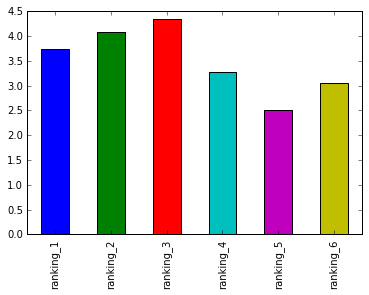

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

star_wars[star_wars.columns[9:15]].mean().plot.bar()

Discuss why you think the respondents ranked the movies the way they did.

- Die "alten" Filme wurden deutlich besser bewertet, als die "neuen".
- "Das Imperium schlägt zurück", besitzt mit Abstand die beste Wertung.
- Der unbeliebteste Film ist "Die Rückkehr der Jedi-Ritter".


Use the df.sum() method to compute the sum of each of the seen columns.

In [24]:
star_wars[star_wars.columns[3:9]].sum()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

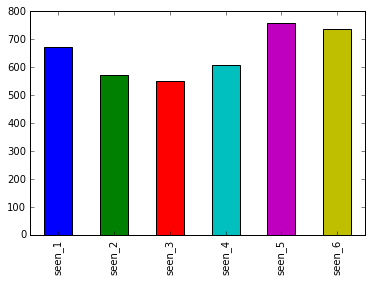

In [25]:
star_wars[star_wars.columns[3:9]].sum().plot.bar()

Write up your thoughts on why the results look the way they do in a Markdown cell. Also discuss how the results correlate with the rankings.

Die "alte" Trilogie wurde im Mittel etwas häufiger gesehen. Besonders die letzten beiden Teile.


Exkurs:

In [26]:
star_wars.corr(method="spearman").loc["seen_1":"seen_6","ranking_1":"ranking_6"]

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
seen_1,0.089712,0.037929,-0.067819,-0.135213,0.077102,0.099884
seen_2,0.266546,0.069531,-0.096515,-0.150888,0.002539,0.033026
seen_3,0.323385,0.158243,-0.170246,-0.139480,-0.033106,-0.019348
seen_4,0.448712,0.390949,0.212460,-0.548428,-0.062085,-0.064336
seen_5,0.357877,0.358307,0.275792,-0.144378,-0.367126,-0.295782
seen_6,0.404073,0.370509,0.276871,-0.169856,-0.224368,-0.427495


Bei den ersten 3 Filmen ist der Zusammenhang relativ klein. Die Filme wurden seltener gesehen und werden im Schnitt für weniger gut befunden. Beinahe unabhängig davon, ob diese gesehen wurden oder nicht.

Der Zusammenhang zwischen den letzten 3 Filmen zeigt sich anders. Hier zeigt sich in großer Einfluss davon, ob der Film gesehen wurde oder nicht auf das Rating. D.h. diejenigen, die einen dieser Filme gesehen haben, haben deutlich positiver gewertet (Ranking; Varianzaufklärung ca. 13-30%).

We can split a dataframe into two groups based on a binary column by creating two subsets of that column. For example, we can split on the Gender.

The subsets will allow us to compute the most viewed movie, the highest-ranked movie, and other statistics separately for each group.

In [27]:
males=star_wars[star_wars["Gender"]=="Male"]
females=star_wars[star_wars["Gender"]=="Female"]

Redo the two previous analyses (find the most viewed movie and the highest-ranked movie) separately for each group, and then compare the results. 

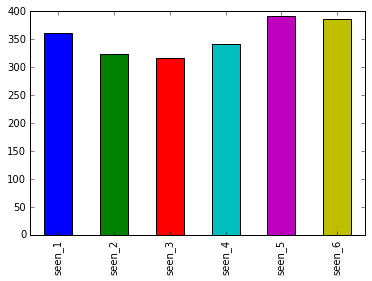

In [28]:
males[males.columns[3:9]].sum().plot.bar()

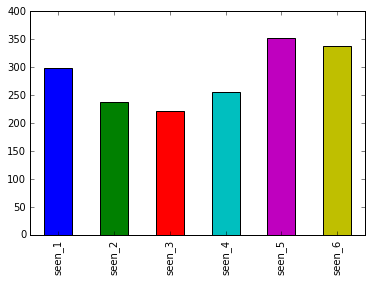

In [29]:
females[females.columns[3:9]].sum().plot.bar()

Die Rangreihenfolge ist bei beiden Geschlechtern in gleich.

Der Unterschied zwischen "alter" und "neuer" Trilogie ist bei Frauen größer.

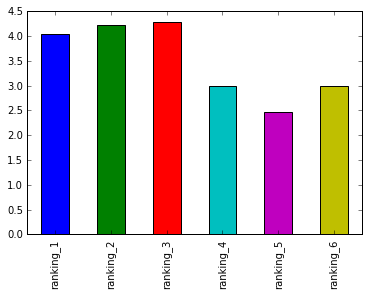

In [30]:
males[males.columns[9:15]].mean().plot.bar()

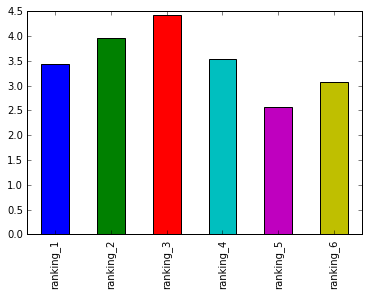

In [31]:
females[females.columns[9:15]].mean().plot.bar()

Bei Männern ist die Differenz zwischen der mittleren Bewertung der ersten drei Teile geringer. Bei Frauen ist die Streuung dagegen höher, die ersten beiden Teile werden im Vergleich von Frauen besser bewertet. Insbesondere Episode 1 wird von Frauen deutlich besser bewertet als von Männern.

Die Bewertung der Teile 4 bis 6 ist bei den Frauen im Schnitt etwas schlechter.

ry to segment the data based on columns like Education, Location (Census Region), and Which character shot first?, which aren't binary. Are they any interesting patterns?

In [32]:
star_wars["Education"].unique()

array(['High school degree', 'Bachelor degree',
       'Some college or Associate degree', nan, 'Graduate degree',
       'Less than high school degree'], dtype=object)

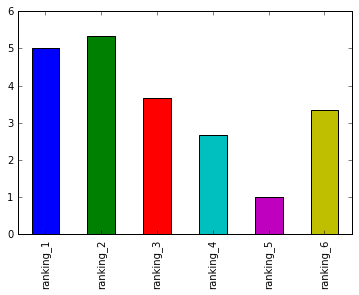

In [33]:
star_wars.loc[star_wars["Education"]=="Less than high school degree",star_wars.columns[9:15]].mean().plot.bar()

Die Daten sind so auffällig, dass die Datenbasis genauer untersucht werden sollte

In [34]:
star_wars[star_wars["Education"]=="Less than high school degree"].shape[0]

7

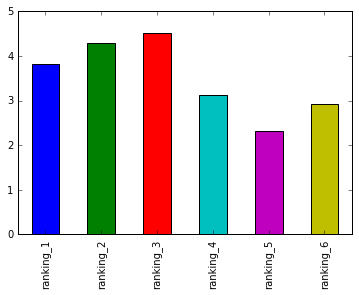

In [35]:
star_wars.loc[star_wars["Education"]=="Bachelor degree",star_wars.columns[9:15]].mean().plot.bar()

In [36]:
star_wars[star_wars["Education"]=="Bachelor degree"].shape[0]

321

Die Ergebnisse sind mit Vorsicht zu genießen, da nur 7 Teilnehmer an der Umfrage ein "less than high school degree" angegeben haben, aber es scheint einen Zusammenhang zwischen niedriger Bildung und
- Der Bewertung alte vs. neue Trilogie
- Der Bewertung insbesondere von Teil 5 und 3


Möglichkeiten der näheren Analyse wäre eine Umwandlung der Bildung in eine Rangreihe und dem Suchen von Korrelationen.

In [37]:
star_wars["Education"].unique()

array(['High school degree', 'Bachelor degree',
       'Some college or Associate degree', nan, 'Graduate degree',
       'Less than high school degree'], dtype=object)

In [38]:
map_degrees={"Less than high school degree":0,"High school degree":1,"Some college or Associate degree":2,"Bachelor degree":3,"Graduate degree":4}

degrees=star_wars["Education"].map(map_degrees)

In [39]:
degrees

1       1.0
2       3.0
3       1.0
4       2.0
5       2.0
6       3.0
7       1.0
8       1.0
9       2.0
10      2.0
11      NaN
12      NaN
13      3.0
14      4.0
15      1.0
16      2.0
17      3.0
18      2.0
19      1.0
20      2.0
21      2.0
22      3.0
23      3.0
24      3.0
25      NaN
26      1.0
27      2.0
28      2.0
29      2.0
30      2.0
       ... 
1157    4.0
1158    4.0
1159    3.0
1160    2.0
1161    2.0
1162    NaN
1163    4.0
1164    3.0
1165    4.0
1166    3.0
1167    2.0
1168    4.0
1169    4.0
1170    3.0
1171    4.0
1172    3.0
1173    1.0
1174    3.0
1175    2.0
1176    4.0
1177    1.0
1178    2.0
1179    0.0
1180    2.0
1181    2.0
1182    2.0
1183    3.0
1184    3.0
1185    2.0
1186    4.0
Name: Education, Length: 1186, dtype: float64

In [40]:
star_wars["degree_ordered"]=degrees
star_wars

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region),degree_ordered
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,...,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic,1.0
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central,3.0
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,...,I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central,1.0
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,...,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central,2.0
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,...,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central,2.0
6,3.292719e+09,True,True,True,True,True,True,True,True,1.0,...,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic,3.0
7,3.292685e+09,True,True,True,True,True,True,True,True,6.0,...,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central,1.0
8,3.292664e+09,True,True,True,True,True,True,True,True,4.0,...,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic,1.0
9,3.292654e+09,True,True,True,True,True,True,True,True,5.0,...,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic,2.0
10,3.292640e+09,True,False,False,True,False,False,False,False,1.0,...,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific,2.0


In [41]:
star_wars.corr(method="spearman").loc["degree_ordered",star_wars.columns[9:15]]

ranking_1    0.043407
ranking_2    0.107439
ranking_3    0.122386
ranking_4   -0.059056
ranking_5   -0.096102
ranking_6   -0.040005
Name: degree_ordered, dtype: float64

Für die "neue" Trilogie zeigt sich eine positive Korrelation. Das heißt: Bei Zunahme des Bildungsniveaus werden diese Teile eher schlechter (=höher) im Ranking angesiedelt.

Für die "alte" Trilogie zeigt sich ein negativer Zusammenhang. Also je höher das Bildungsniveau, desto beliebter sind diese Filme.

Die Zusammenhänge sind allerdings sehr niedrig und deshalb vernachlässigbar (Varianzaufklärung <2%).

Clean up columns 15 to 29, which contain data on the characters respondents view favorably and unfavorably.

In [42]:
star_wars.columns[15:29]

Index(['Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28'],
      dtype='object')

In [43]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6', 'ranking_1',
       'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)', 

In [44]:
star_wars[star_wars.columns[17]].value_counts(dropna=False)

Very favorably                                 547
NaN                                            355
Somewhat favorably                             210
Neither favorably nor unfavorably (neutral)     48
Somewhat unfavorably                            12
Unfamiliar (N/A)                                 8
Very unfavorably                                 6
Name: Unnamed: 17, dtype: int64

In [45]:
fav_mapping={"Very unfavorably":-2,"Somewhat unfavorably":-1,"Neither favorably nor unfavorably (neutral)":0,"Somewhat favorably":1,"Very favorably":2,"Unfamiliar (N/A)":np.nan}

for i in star_wars.columns[15:29]:
    star_wars[i]=star_wars[i].map(fav_mapping)
    
star_wars[star_wars.columns[15:29]]

,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,2.0,2.0,2.0,2.0,2.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,-1.0,2.0,2.0,2.0,2.0,2.0
5,2.0,1.0,1.0,-1.0,2.0,-2.0,1.0,0.0,2.0,1.0,1.0,-2.0,1.0,1.0
6,2.0,2.0,2.0,2.0,2.0,0.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0
7,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,-1.0,1.0,2.0
8,2.0,1.0,2.0,0.0,2.0,-2.0,-1.0,0.0,1.0,1.0,1.0,-2.0,-1.0,2.0
9,2.0,-1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,0.0,1.0,-2.0,-1.0,1.0
10,0.0,2.0,2.0,2.0,2.0,-1.0,2.0,-1.0,-1.0,2.0,2.0,2.0,-1.0,2.0


In [46]:
star_wars[star_wars.columns[17]].value_counts(dropna=False)

 2.0    547
NaN     363
 1.0    210
 0.0     48
-1.0     12
-2.0      6
Name: Unnamed: 17, dtype: int64

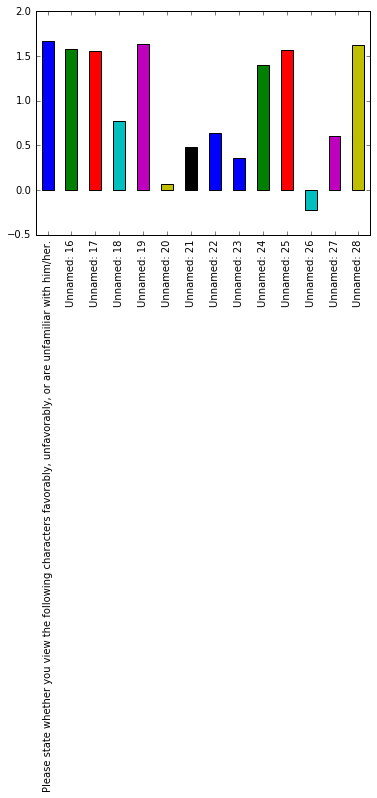

In [47]:
star_wars[star_wars.columns[15:29]].mean().plot.bar()